In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)


In [40]:
X = combi[['Dubai','Gasoil']]
Y = combi['ESPO']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Du= price["pred Dubai"]
Go= price["Gasoil"]

linear_ESPO=regr.intercept_+ regr.coef_[0]*Du + regr.coef_[1]*Go
print(linear_ESPO)

Intercept: 
 0.675542459448123
Coefficients: 
 [0.22594814 0.02716876]
                            OLS Regression Results                            
Dep. Variable:                   ESPO   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     35.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.06e-14
Time:                        10:42:33   Log-Likelihood:                -321.79
No. Observations:                 236   AIC:                             649.6
Df Residuals:                     233   BIC:                             660.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
nonlinear_ESPO = 11.3890705439685 + 0.199142482697583*np.power(Go,2) + 0.00184730192306026*Du*np.power(Go,2) - 2.57509779249408*Go - 0.00455818401805749*np.power(Go,3) - 0.0333384283920602*np.power(Du,2)

print(nonlinear_ESPO)


0    0.130368
1    0.952856
2    1.573838
3    0.526031
4    1.114053
5    0.366610
dtype: float64


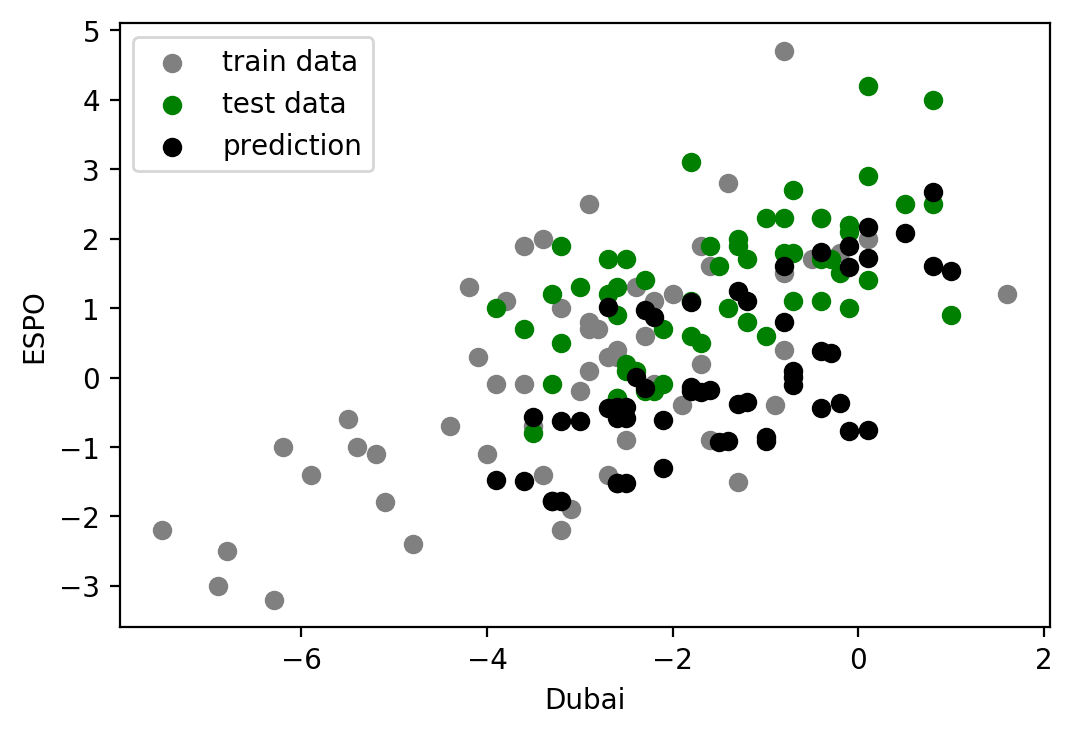

Mean squared error: 0.28
Feature ranking:
Feature Dubai (0.604674)
Feature Gasoil (0.395326)


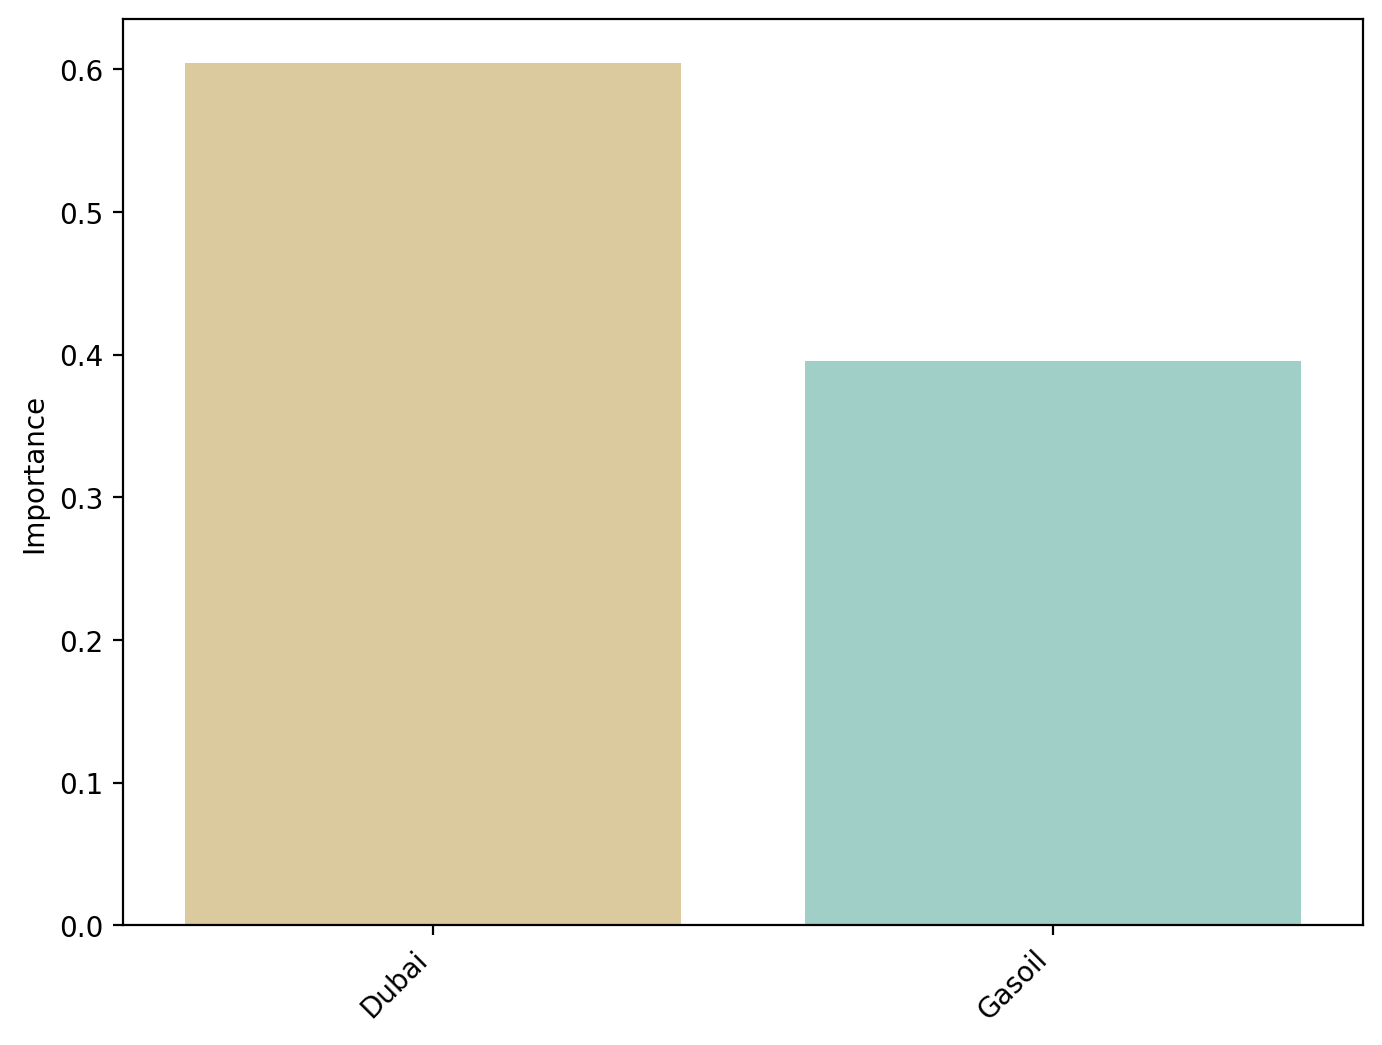

In [48]:
train_combi = combi.iloc[122:179:,1:]
test_combi = combi.iloc[180:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dubai","Gasoil"]]
y_train=train_combi["ESPO"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dubai","Gasoil"]]
y_test=test_combi["ESPO"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dubai"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dubai"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dubai"], y_pred,  color='black')



plt.xlabel("Dubai")
plt.ylabel("ESPO")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [57]:
data_df = price[['pred Dubai','Gasoil']]
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0  0.061701
1  0.866027
2  0.289218
3  0.077316
4  1.125837
5 -1.290570


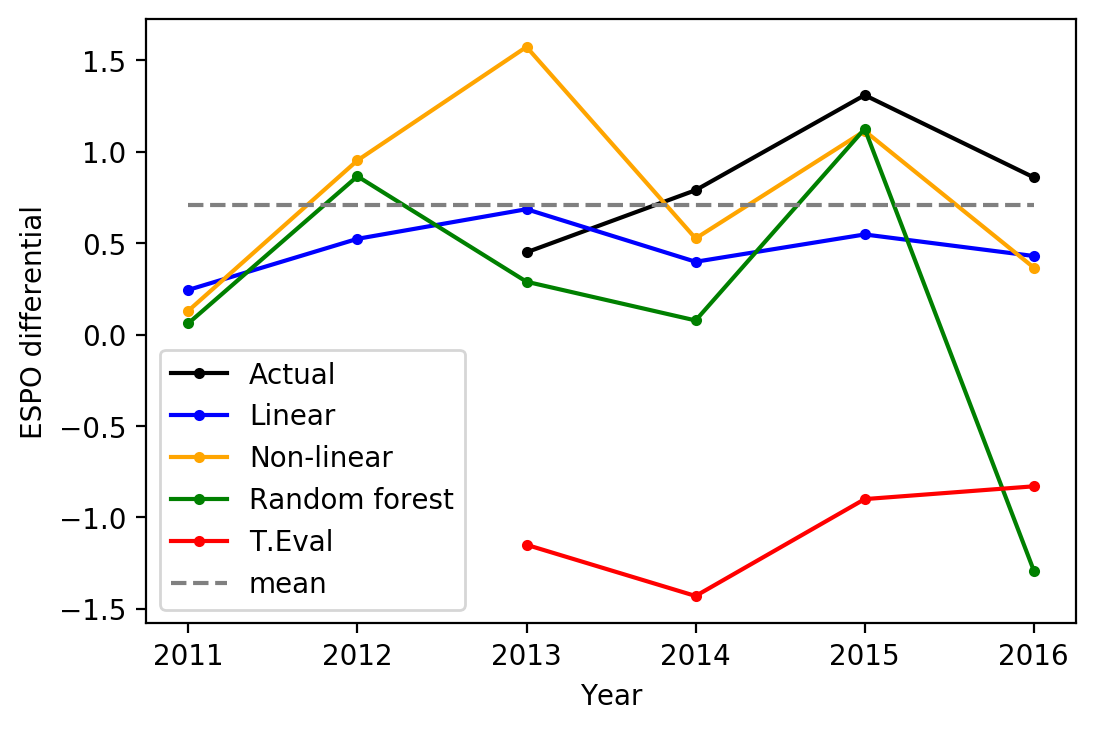

In [59]:
plt.plot(price["Year"],price["Actual ESPO"],'k.-')
plt.plot(price["Year"],linear_ESPO,'b.-')
plt.plot(price["Year"],nonlinear_ESPO,'.-',color ='orange')
plt.plot(price["Year"],y_pred,'g.-')
plt.plot(price["Year"],price["TE ESPO"],'r.-')
plt.plot([price["Year"].iloc[0],price["Year"].iloc[-1]],[0.71,0.71],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('ESPO differential')
plt.legend(("Actual","Linear","Non-linear","Random forest","T.Eval","mean"))

In [60]:
#plt.plot([price["Year"].iloc[0],price["Year"].iloc[-1]],[-1.25,-1.25])


In [73]:
price["Year"].iloc[1]

2012

In [52]:
    price.drop(["Actual Dubai","TE Dubai","Actual WTI","TE WTI","Actual BL","TE BL"],axis=1)

,Year,Dated brent,Butane,VGO 0.5%,Jet Oil,Gasoil,FO 1%,FO 3.5%,pred Dubai,Actual ESPO,TE ESPO
0,2011,112,-29.0,3.47,16.92,13.98,-10.86,-16.83,-3.589,NaN,NaN
1,2012,110,-32.0,5.00,17.00,15.00,-4.00,-11.00,-2.475,NaN,NaN
2,2013,107,-32.4,4.90,19.70,17.10,-5.50,-12.10,-2.010,0.45,-1.15
3,2014,108,-34.0,6.00,15.00,14.00,-9.00,-19.00,-2.910,0.79,-1.43
4,2015,63,-29.0,1.00,19.00,16.00,-12.00,-16.00,-2.489,1.31,-0.90
5,2016,65,-14.6,2.00,12.50,10.50,-10.50,-14.50,-2.350,0.86,-0.83
